Concentração ótima: c = 2.000
Taxa máxima: r = 0.736


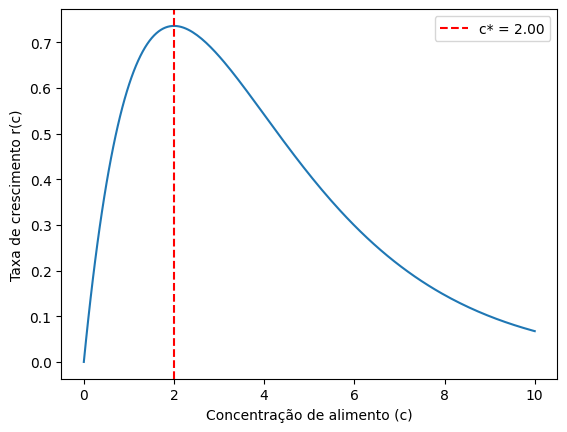

In [1]:
#1

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# parâmetros do modelo
a = 1.0
b = 0.5

# função taxa de crescimento
def r(c):
    return a * c * np.exp(-b * c)

# otimização numérica
res = minimize_scalar(lambda c: -r(c), bounds=(0, 10), method='bounded')

print(f"Concentração ótima: c = {res.x:.3f}")
print(f"Taxa máxima: r = {r(res.x):.3f}")

# gráfico ilustrativo
c_vals = np.linspace(0, 10, 200)
plt.plot(c_vals, r(c_vals))
plt.axvline(res.x, color='r', linestyle='--', label=f"c* = {res.x:.2f}")
plt.xlabel("Concentração de alimento (c)")
plt.ylabel("Taxa de crescimento r(c)")
plt.legend()
plt.show()


In [2]:
#2
import numpy as np

# Sistema nas 3 equações originais:
# 2x2 + 5x3 = 9
# 2x1 + x2 + x3 = 9
# 3x1 + x2 = 10

def f_x1(x2, x3): return (9 - x2 - x3)/2.0   # eq (2)
def f_x2(x1):     return 10 - 3.0*x1         # eq (3)
def f_x3(x2):     return (9 - 2.0*x2)/5.0    # eq (1)

x0 = np.array([0.0, 0.0, 0.0])  # [x1, x2, x3]

# --- Jacobi (3 iterações) ---
xJ = x0.copy()
hist_J = [xJ.copy()]
for _ in range(3):
    x1_new = f_x1(xJ[1], xJ[2])
    x2_new = f_x2(xJ[0])
    x3_new = f_x3(xJ[1])
    xJ = np.array([x1_new, x2_new, x3_new])
    hist_J.append(xJ.copy())

# --- Gauss-Seidel (3 iterações) ---
xG = x0.copy()
hist_G = [xG.copy()]
for _ in range(3):
    xG[0] = f_x1(xG[1], xG[2])  # usa valores "mais recentes"
    xG[1] = f_x2(xG[0])
    xG[2] = f_x3(xG[1])
    hist_G.append(xG.copy())

# --- Solução exata ---
A = np.array([[0, 2, 5],
              [2, 1, 1],
              [3, 1, 0]], dtype=float)
b = np.array([9, 9, 10], dtype=float)
x_exact = np.linalg.solve(A, b)

print("Jacobi:", hist_J)
print("Gauss-Seidel:", hist_G)
print("Exata:", x_exact)


Jacobi: [array([0., 0., 0.]), array([ 4.5, 10. ,  1.8]), array([-1.4, -3.5, -2.2]), array([ 7.35, 14.2 ,  3.2 ])]
Gauss-Seidel: [array([0., 0., 0.]), array([ 4.5, -3.5,  3.2]), array([ 4.65, -3.95,  3.38]), array([ 4.785, -4.355,  3.542])]
Exata: [ 6. -8.  5.]


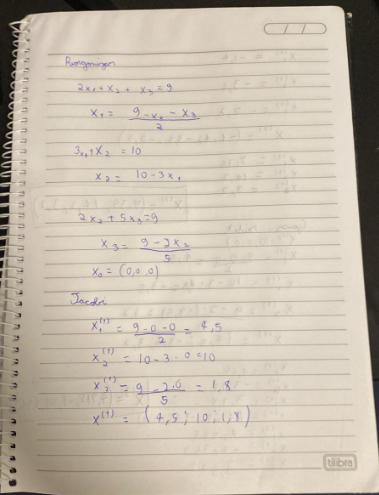

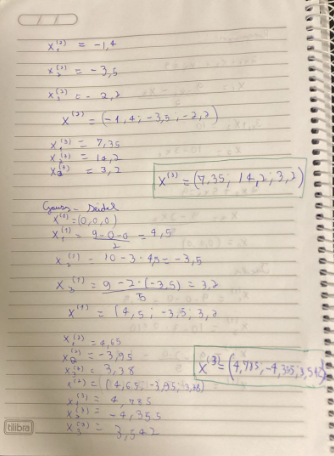

- Jacobi: com a ordem escolhida, não converge (raio espectral da matriz de iteração > 1).

- Gauss-Seidel: com a ordem acima, converge linearmente (raio espectral ≈ 0,9).

In [ ]:
#3
import numpy as np

# ======= PREENCHA AQUI com a tabela do enunciado (kg por unidade) =======
# Linhas: [metal, plastico, borracha]
# Colunas: componentes [1, 2, 3]
A = np.array([
    [15,17,19],
    [0.3,0.4,0.55], 
    [1.0,1.2,1.5]
], dtype=float)

# Totais disponíveis (kg/dia) do enunciado
b = np.array([3.89, 0.095, 0.282], dtype=float)

m, n = A.shape
assert m == 3 and n == 3, "A deve ser 3x3"

def solve_exact_or_ls(A, b):
    # Tenta solução exata
    try:
        x_exact = np.linalg.solve(A, b)
        residual = np.linalg.norm(A @ x_exact - b, ord=2)
        return x_exact, residual, True
    except np.linalg.LinAlgError:
        # Se A for singular ou sistema inconsistente, cai para LS
        pass

    # Mínimos quadrados
    x_ls, *_ = np.linalg.lstsq(A, b, rcond=None)
    residual = np.linalg.norm(A @ x_ls - b, ord=2)
    return x_ls, residual, False

x, res, exact = solve_exact_or_ls(A, b)

print(("Solução exata" if exact else "Solução por mínimos quadrados"), "x =", x)
print("Resíduo ||Ax - b||_2 =", res)

# Opcional: força não-negatividade via heurística simples (zera negativos e reequilibra em LS).
# Para algo robusto, use NNLS (SciPy). Abaixo, uma alternativa sem SciPy:
x_nn = x.copy()
x_nn[x_nn < 0] = 0.0
# Ajuste fino em LS restringindo entradas zeradas como fixas:
mask_free = x_nn > 0  # livres
if mask_free.any():
    A_free = A[:, mask_free]
    x_free, *_ = np.linalg.lstsq(A_free, b, rcond=None)
    x_nn[:] = 0
    x_nn[mask_free] = x_free
    print("Solução não-negativa (heurística):", x_nn)
    print("Resíduo NN ||Ax - b||_2 =", np.linalg.norm(A @ x_nn - b, 2))

# Checagem de inteiros (se a produção tiver que ser inteira):
x_round = np.rint(x_nn).astype(int)
print("Arredondada para inteiros:", x_round)
print("Resíduo integer ||Ax - b||_2 =", np.linalg.norm(A @ x_round - b, 2))

    

Solução exata x = [0.09 0.06 0.08]
Resíduo ||Ax - b||_2 = 5.551115123125783e-17
Solução não-negativa (heurística): [0.09 0.06 0.08]
Resíduo NN ||Ax - b||_2 = 1.3371736463036914e-15
Arredondada para inteiros: [0 0 0]
Resíduo integer ||Ax - b||_2 = 3.901365017529121


In [4]:
import numpy as np

# ======== QUESTÃO 4 – Grafo de 5 bairros ========

# Ordem dos bairros
labels = ["A", "B", "C", "D", "E"]

# Laplaciana conforme o grafo A–B, A–D, B–C, B–D, D–E
L = np.array([
    [ 2, -1,  0, -1,  0],   # A
    [-1,  3, -1, -1,  0],   # B
    [ 0, -1,  1,  0,  0],   # C
    [-1, -1,  0,  3, -1],   # D
    [ 0,  0,  0, -1,  1]    # E
], dtype=float)

# Vetor de entrada/saída de passageiros (+100 entra em A, -100 sai em C)
b = np.array([100, 0, -100, 0, 0], dtype=float)

# Fixamos x_C = 0 (nó de referência)
ground = 2  # índice do C
keep = [i for i in range(len(labels)) if i != ground]

L_red = L[np.ix_(keep, keep)]
b_red = b[keep]

# Resolve L_red x_red = b_red
x_red = np.linalg.solve(L_red, b_red)

# Recompõe vetor completo de potenciais
x = np.zeros(len(labels))
x[keep] = x_red
x[ground] = 0.0

# ---- Resultados ----
print("Potenciais de equilíbrio (x_i):")
for lab, val in zip(labels, x):
    print(f"  {lab}: {val:.2f}")

# Arestas do grafo
edges = [("A","B"),("A","D"),("B","C"),("B","D"),("D","E")]
idx = {lab:i for i,lab in enumerate(labels)}

print("\nFluxos por aresta (f_ij = x_i - x_j):")
for u,v in edges:
    i, j = idx[u], idx[v]
    f = x[i] - x[j]
    sentido = f"({u}->{v})" if f >= 0 else f"({v}->{u})"
    print(f"  {u}-{v}: {abs(f):.2f} {sentido}")

# --- Efeito de dobrar a entrada em A ---
b2 = 2*b
x2_red = np.linalg.solve(L_red, 2*b_red)
x2 = np.zeros(len(labels))
x2[keep] = x2_red
x2[ground] = 0.0

print("\nSe dobrar a entrada em A (+200, -200):")
for lab, val in zip(labels, x2):
    print(f"  {lab}: {val:.2f}")
print("=> Todos os potenciais e fluxos dobram.")


Potenciais de equilíbrio (x_i):
  A: 166.67
  B: 100.00
  C: 0.00
  D: 133.33
  E: 133.33

Fluxos por aresta (f_ij = x_i - x_j):
  A-B: 66.67 (A->B)
  A-D: 33.33 (A->D)
  B-C: 100.00 (B->C)
  B-D: 33.33 (D->B)
  D-E: 0.00 (D->E)

Se dobrar a entrada em A (+200, -200):
  A: 333.33
  B: 200.00
  C: 0.00
  D: 266.67
  E: 266.67
=> Todos os potenciais e fluxos dobram.


In [3]:
from numpy.linalg import solve
from numpy import array
# Laplaciana conforme o grafo A–B, A–D, B–C, B–D, D–E
L = array([
    [ 2, -1,  0, -1,  0],   # A
    [-1,  3, -1, -1,  0],   # B
    [ 0, -1,  1,  0,  0],   # C
    [-1, -1,  0,  3, -1],   # D
    [ 0,  0,  0, -1,  1]    # E
], dtype=float)

# Vetor de entrada/saída de passageiros (+100 entra em A, -100 sai em C)
b = array([100, 0, -100, 0, 0], dtype=float)


print(solve(L,b))

[  60.           -6.66666667 -106.66666667   26.66666667   26.66666667]


- B) O sistema 𝐿𝑥 = 𝑏 é linear: se dobramos o vetor b, dobram-se os potenciais x e, portanto, os fluxos também dobram.

In [17]:
import numpy as np

# -----------------------------
# Q5 — Sistema Ax = b (c1..c4)
# -----------------------------
A = np.array([
    [225,   0,  -25,   0],
    [  0, 175,    0, -125],
    [-225,  0,  275,  -50],
    [  0, -25, -250,  275]
], dtype=float)

# b "baseline"
b = np.array([1400, 100, 2000, 0.0], dtype=float)

def solve(A, b):
    x = np.linalg.solve(A, b)
    res = np.linalg.norm(A @ x - b, 2)
    return x, res

# (a) Concentrações nas 4 salas
c_base, res_base = solve(A, b)
print("(a) Concentrações baseline [c1, c2, c3, c4] (mg/m^3):")
print("    ", np.round(c_base, 6), "| resíduo =", f"{res_base:.2e}")

b_fum = np.array([1000,0,0,0])
b_gre = np.array([0,0,2000,0])
b_vent = np.array([400,100,0,0])


res_fum=solve(A,b_fum)
print("Fumantes: ",res_fum[0][1]/c_base[1]*100)

res_gre = solve(A,b_gre)
print("Grelha: ",res_gre[0][1]/c_base[1]*100)

res_vent = solve(A,b_vent)
print("Ventilação: ",res_vent[0][1]/c_base[1]*100)

(a) Concentrações baseline [c1, c2, c3, c4] (mg/m^3):
     [ 8.099617 12.344828 16.896552 16.482759] | resíduo = 0.00e+00
Fumantes:  27.932960893854748
Grelha:  55.865921787709496
Ventilação:  16.201117318435752


In [22]:
minas = np.array([[0.52,.2,.25],[.3,.5,.2],[.18,.3,.55]])
b = np.array([4800,5810,5690], dtype=float)

sol  = np.linalg.solve(minas,b)
print("Solução inicial: ", sol)

b1 = np.array([5800,5810,5690], dtype=float)

sol1 = np.linalg.solve(minas,b1)
print("Caso retirar 1000 a mais de areia: ",sol1)

Solução inicial:  [4011.62790698 7162.79069767 5125.58139535]
Caso retirar 1000 a mais de areia:  [6511.62790698 5662.79069767 5125.58139535]
